In [62]:
# Assignment Page 35-36: 3-1
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [63]:
import nsfg
resp = nsfg.ReadFemResp()



In [64]:
# List out the columns
resp.columns

Index(['caseid', 'rscrinf', 'rdormres', 'rostscrn', 'rscreenhisp',
       'rscreenrace', 'age_a', 'age_r', 'cmbirth', 'agescrn',
       ...
       'pubassis_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt', 'secu_r',
       'sest', 'cmintvw', 'cmlstyr', 'screentime', 'intvlngth'],
      dtype='object', length=3087)

In [66]:
import thinkplot
import thinkstats2
# Peform the pmf for numkdhh the actual one
pmf = thinkstats2.Pmf(resp.numkdhh, label="Unbiased")

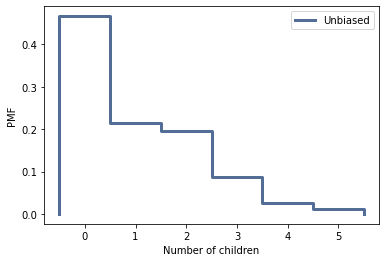

In [68]:
# plot the actaul pmf for no of children
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Number of children", ylabel="PMF")
# It shows that probablity of having no children is more than 40%

In [69]:
# Now calculate the biased distribution
# This function computes the biased PMF we would get if we surveyed children and asked how many children in their family
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [70]:
biased_pmf = BiasPmf(pmf, label="Biased")

In [71]:
biased_pmf
# We can see no children has zero probabilty with biased distribution

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'Biased')

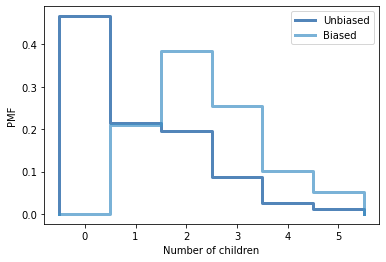

In [72]:
# plot the biased and unbiased distribution
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [73]:
# Assignment Page 35-36: 3-2
# Compute the mean
# unbiased mean with standard function
pmf.Mean()

1.024205155043831

In [74]:
# Biased mean
biased_pmf.Mean()

2.403679100664282

In [75]:
# use function to compute the mean
def PmfMean(pmf):
    return sum(p * x for x, p in pmf.Items())

In [76]:

# mean for biased
PmfMean(biased_pmf)

2.403679100664282

In [77]:
#Unbiased
PmfMean(pmf)

1.024205155043831

In [78]:
# Assignment Page 47: 4-1
# Exercise: How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), 
# compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

## Ans -->  My Birth weight was 8 lb and I am 2nd child

In [79]:
# Load first file to get the attribute totalwgt_lb 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
import first
live, firsts, others = first.MakeFrames()

In [80]:
# compute the distribution of birth weight for first babies and others.
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


In [82]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

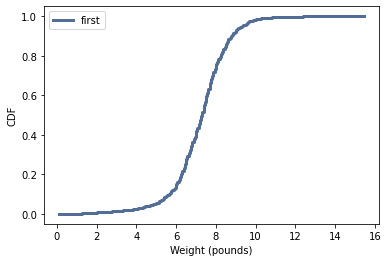

In [83]:
# First Child CDF distribution
thinkplot.Cdf(first_cdf)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

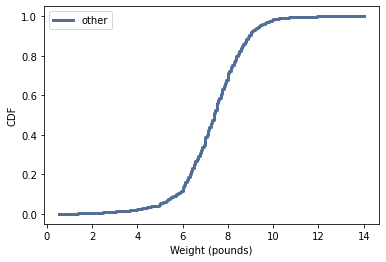

In [84]:
# Others Child CDF distribution graph
thinkplot.Cdf(other_cdf)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [85]:
# As I am 2nd child , now compute the PercentileRank of my birth weight 8 pound
other_cdf.PercentileRank(8.0)

71.12299465240642

In [86]:
# Now compare the CDF for live child and my PercentileRank
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')
live_cdf.PercentileRank(8.0)
#--> For Live child senario , percentile Rank is more( 2%) than overall other child senario

73.32374419119274

In [87]:
# Assignment Page 48: 4-2
##  The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, 
## every value in the range should have the same probability…)
import numpy as np

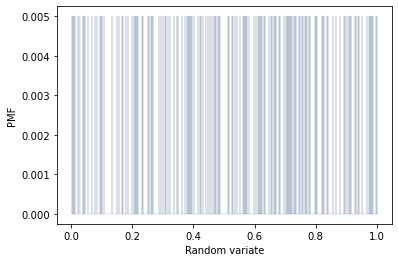

In [88]:
# Generate 200 random number
ran_df = np.random.random(200)

# Perform PMF and plot the distribution
ran_pmf = thinkstats2.Pmf(ran_df)
thinkplot.Pmf(ran_pmf, linewidth=0.2)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

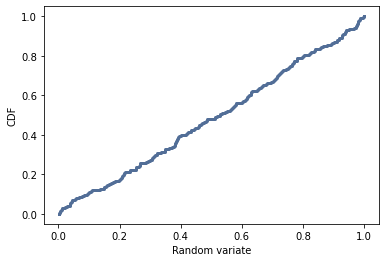

In [89]:
# Perform CDF and plot the distribution

ran_cdf = thinkstats2.Cdf(ran_df)
thinkplot.Cdf(ran_cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')

In [ ]:
## From the above plot it looks like CDF distribution is uniform where as PMF is not uniform distribution.